## Import and Read data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Analyze SalePrice and with the most correlated variables

/Users/linger/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

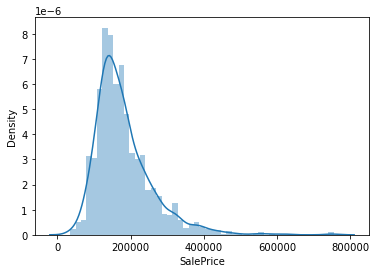

In [21]:
sns.distplot(df_train['SalePrice'])

In [22]:
print('Skewness: %f' % df_train['SalePrice'].skew())

Skewness: 1.882876


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

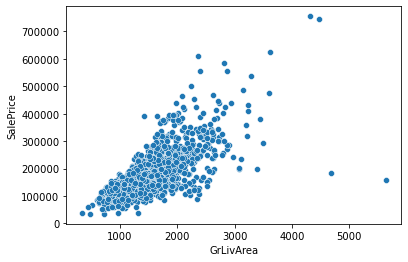

In [23]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

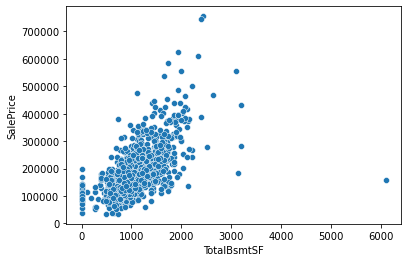

In [24]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df_train)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

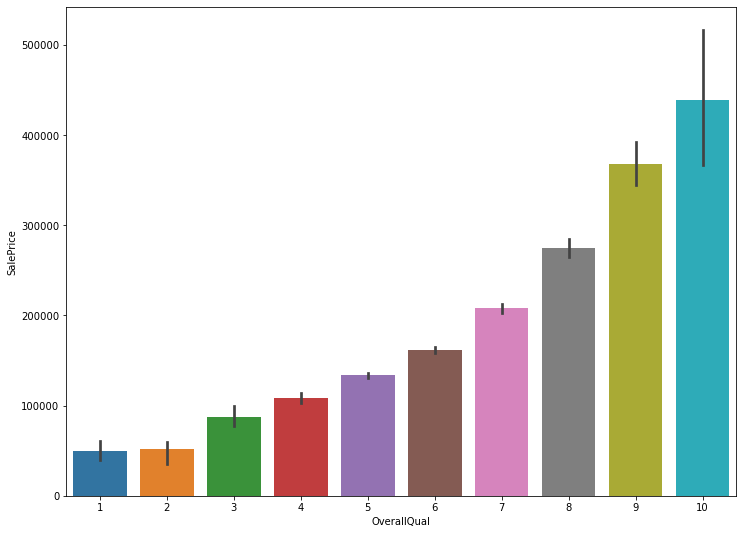

In [25]:
plt.subplots(figsize=(12,9))
sns.barplot(x='OverallQual',y='SalePrice',data=df_train)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

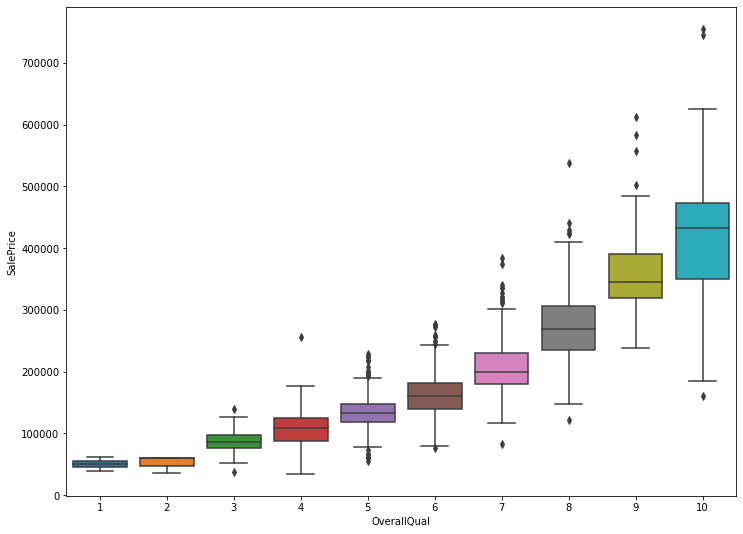

In [26]:
plt.subplots(figsize=(12,9))
sns.boxplot(x='OverallQual',y='SalePrice', data=df_train)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

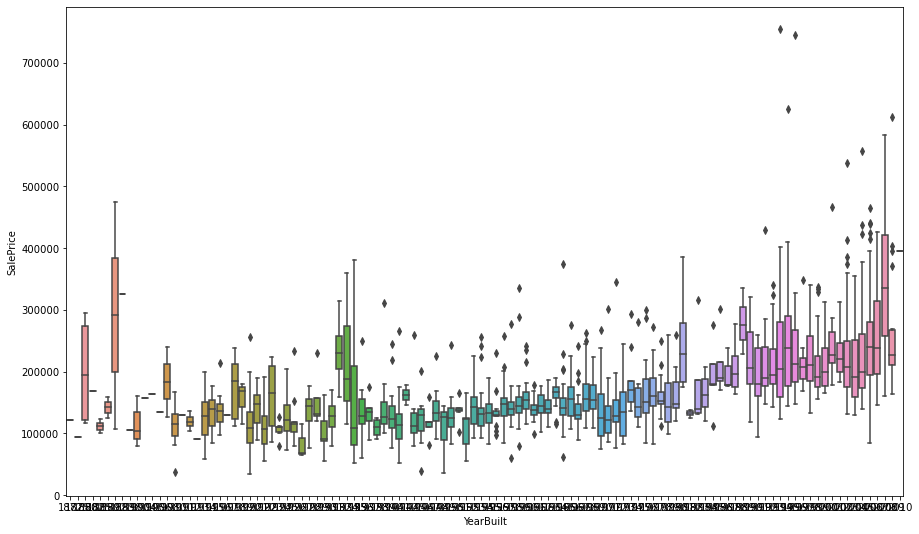

In [27]:
fig=plt.subplots(figsize=(15,9))
sns.boxplot(x='YearBuilt',y='SalePrice',data=df_train)

<AxesSubplot:>

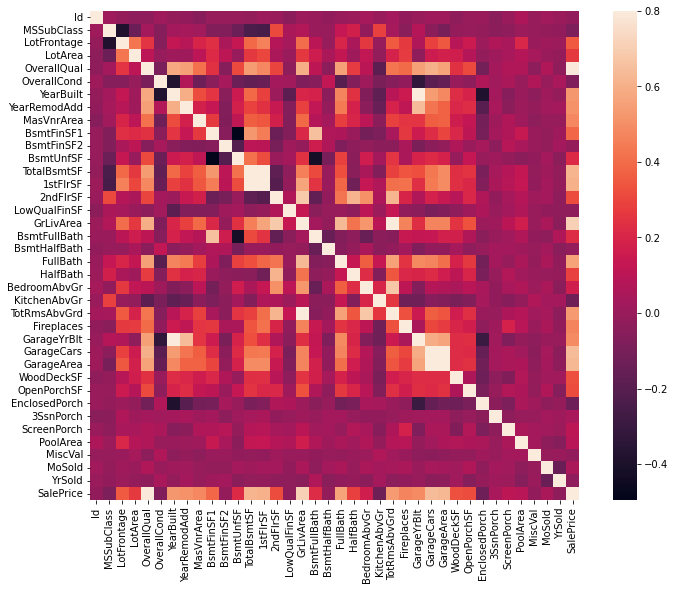

In [9]:
corr_all=df_train.corr()
fig= plt.subplots(figsize=(12, 9))
sns.heatmap(corr_all,square=True,vmax=.8)

<AxesSubplot:>

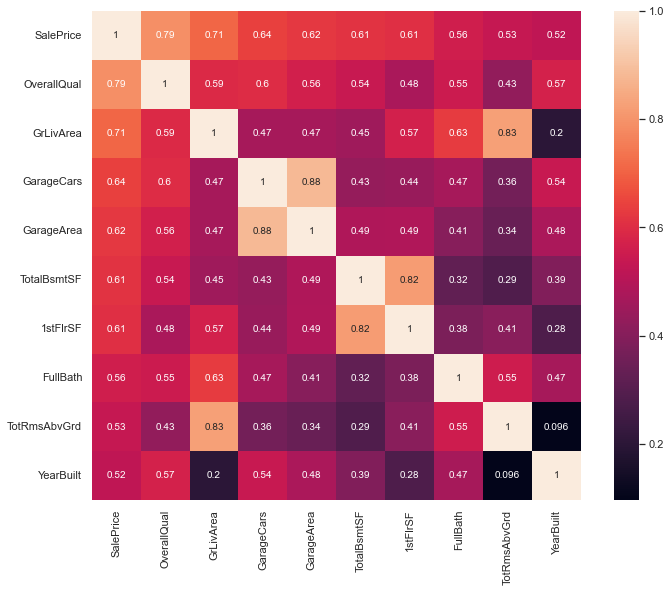

In [11]:
fig= plt.subplots(figsize=(12, 9))
cols = corr_all.nlargest(10, 'SalePrice')['SalePrice'].index
corr_ten = df_train[cols].corr()
sns.set(font_scale=1)
sns.heatmap(corr_ten, annot=True, square=True, annot_kws={'size': 10})

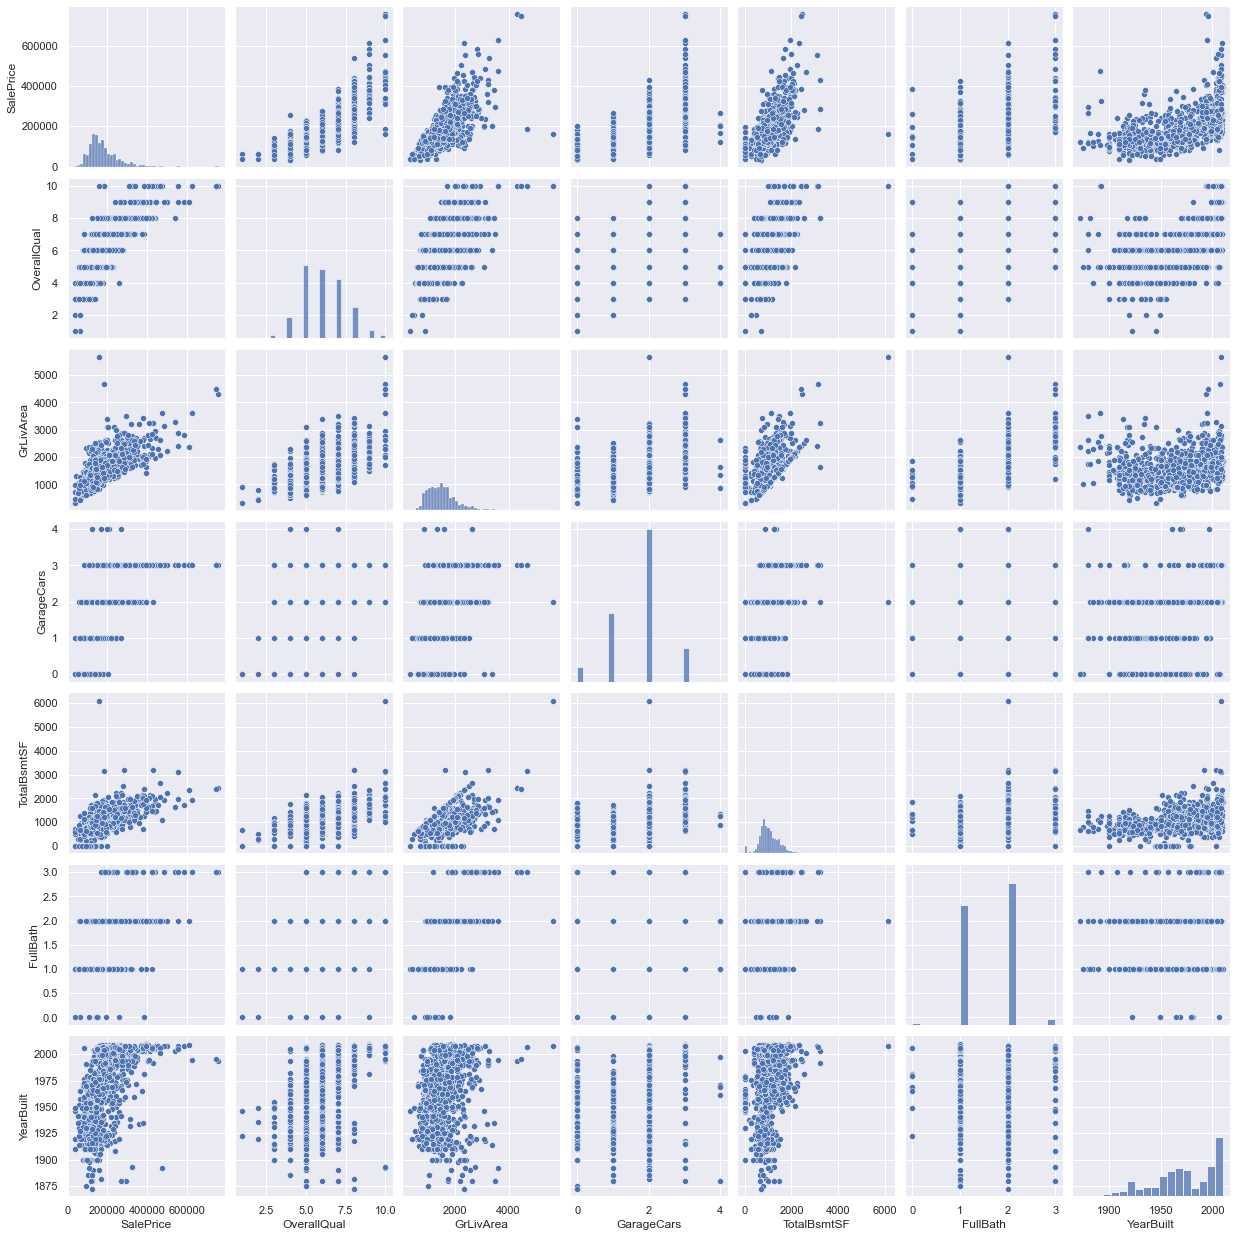

In [30]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])

## Deal with missing data

In [31]:
(df_train.isnull().sum()/df_train.count()).sort_values(ascending=False)

PoolQC         207.571429
MiscFeature     26.037037
Alley           15.043956
Fence            4.195730
FireplaceQu      0.896104
                  ...    
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [32]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [33]:
df_train=df_train.drop(missing_data[missing_data['Total']>1].index,1)

/var/folders/1k/vpftfbvn5qvblj473jslq3680000gn/T/ipykernel_24719/221684979.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train=df_train.drop(missing_data[missing_data['Total']>1].index,1)


In [34]:
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [35]:
df_train.isnull().sum().max()

0

## Test statistical assumptions

/Users/linger/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

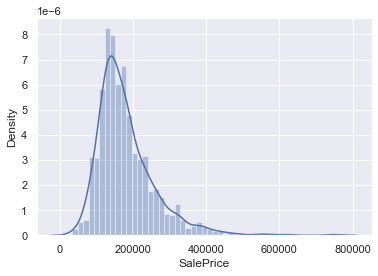

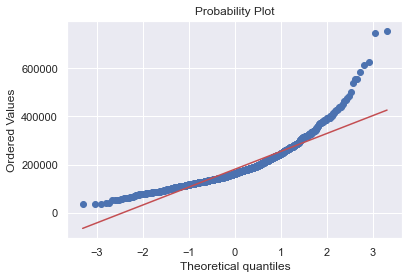

In [15]:
sns.distplot(df_train['SalePrice'])
fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot=plt)

In [23]:
df_train['SalePrice']=np.log(df_train['SalePrice'])

/Users/linger/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


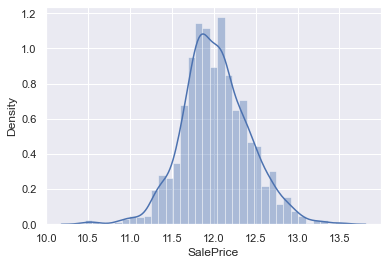

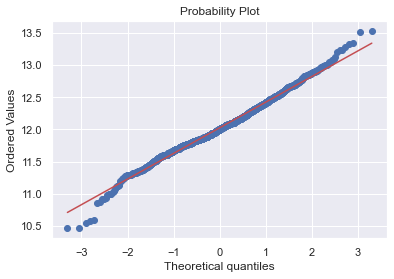

In [24]:
sns.distplot(df_train['SalePrice'])
fig=plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

/Users/linger/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


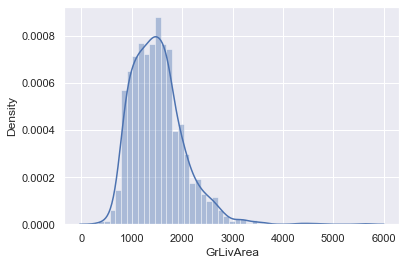

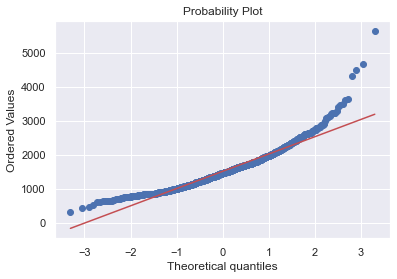

In [18]:
sns.distplot(df_train['GrLivArea'])
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [25]:
df_train['GrLivArea']=np.log(df_train['GrLivArea'])

/Users/linger/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


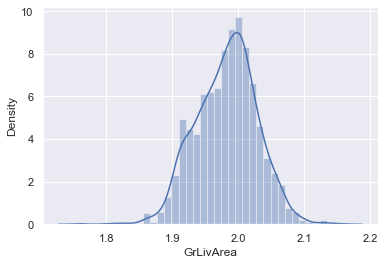

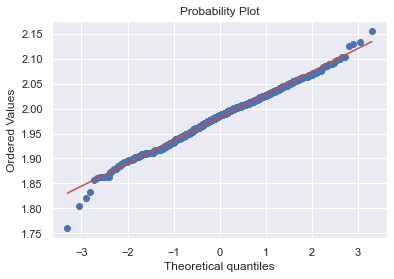

In [26]:
sns.distplot(df_train['GrLivArea'])
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'], plot=plt)

/Users/linger/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


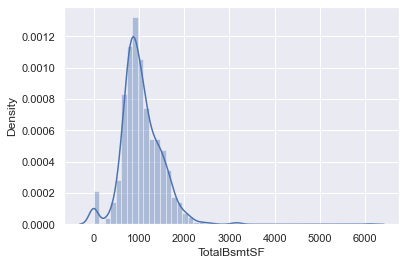

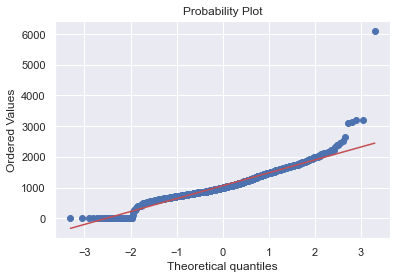

In [27]:
sns.distplot(df_train['TotalBsmtSF'])
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [32]:
df_train['TotalBsmtSF_new'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['TotalBsmtSF_new'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'TotalBsmtSF_new'] = 1

In [33]:
df_train.loc[df_train['TotalBsmtSF_new']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

/Users/linger/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/linger/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


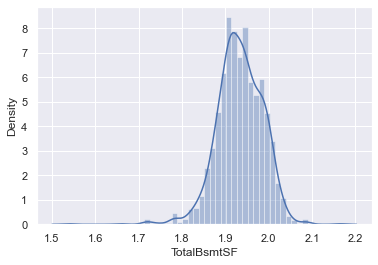

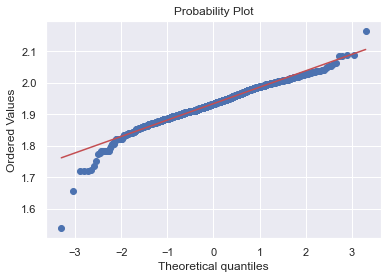

In [34]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'])
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

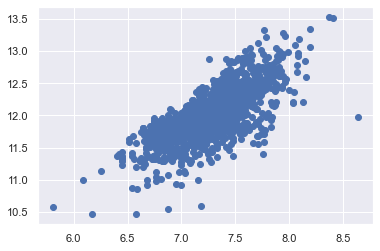

In [51]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

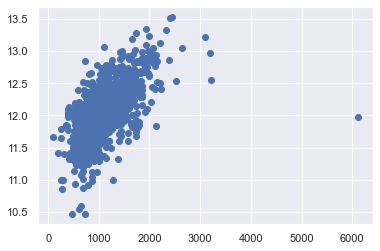

In [52]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])